In [3]:
# 1️⃣ Import Libraries
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 2️⃣ Load Data
news_path = os.path.join('..', 'Datas', 'newsData', 'raw_analyst_ratings.csv')
yfinance_path = os.path.join('..', 'Datas', 'yfinance_data', 'Data')

news_df = pd.read_csv(news_path)
print(news_df.head())
print(news_df.info())

# Load stock CSVs
stock_files = glob.glob(os.path.join(yfinance_path, '*.csv'))
stocks_data = {}
for file in stock_files:
    ticker = os.path.basename(file).replace('.csv','')
    stocks_data[ticker] = pd.read_csv(file)
    print(f"{ticker} data loaded, shape: {stocks_data[ticker].shape}")



   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [5]:
# 3️⃣ News EDA
# Headline length
news_df['headline_length'] = news_df['headline'].str.len()
print(news_df['headline_length'].describe())

# Publisher count
print(news_df['publisher'].value_counts())

# Date analysis
# Convert date column to datetime (automatic format inference)
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')

# Check for any NaT (failed conversions)
print(news_df[news_df['date'].isna()])



count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64
         Unnamed: 0                                           headline  \
10               10    30 Stocks Moving in Friday's Pre-Market Session   
11               11  SVB Leerink Maintains Outperform on Agilent Te...   
12               12  8 Stocks Moving In Thursday's A

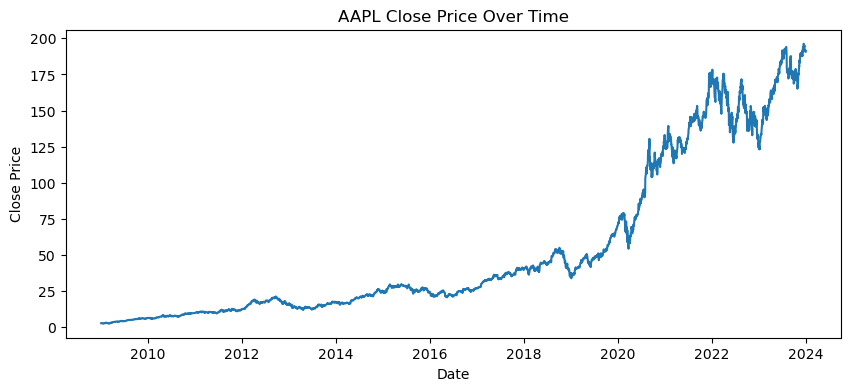

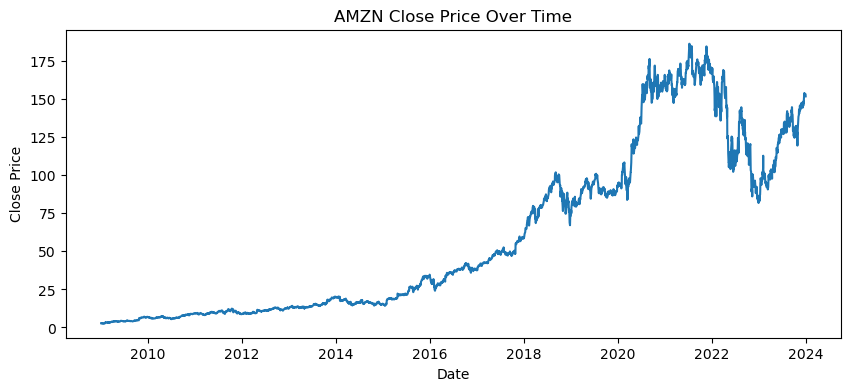

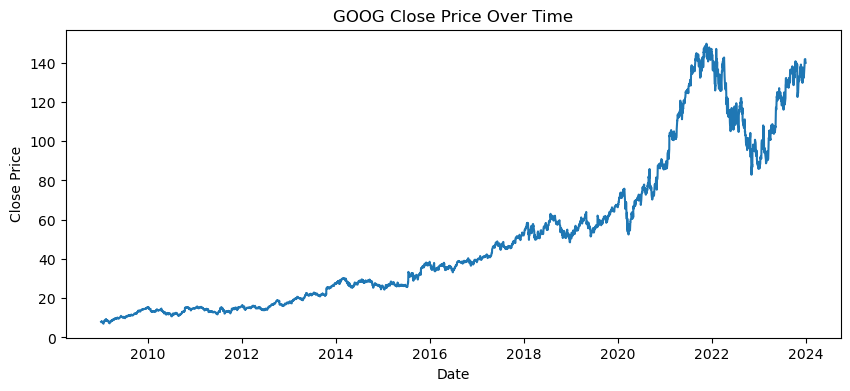

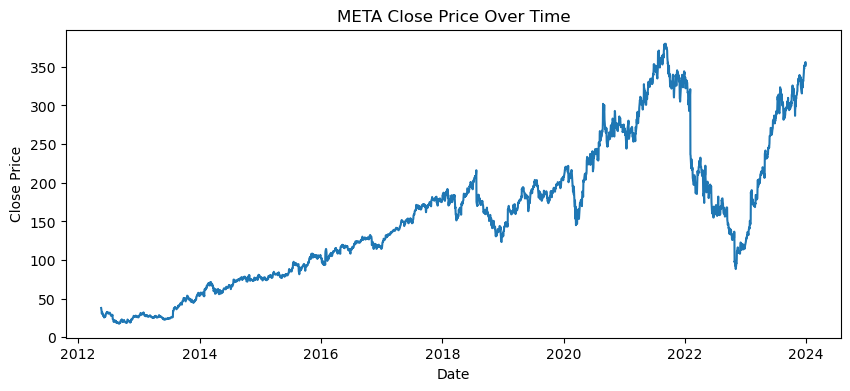

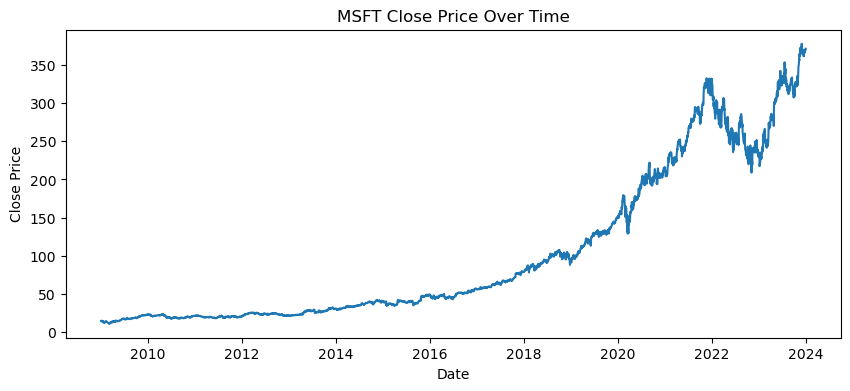

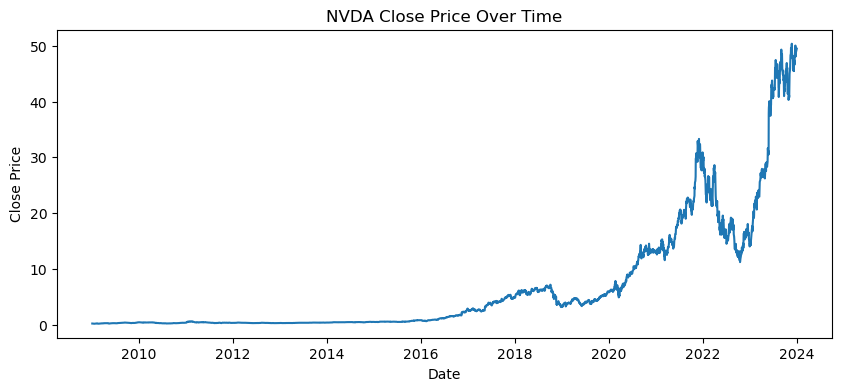

In [6]:
# 4️⃣ Stock EDA Example: Closing prices
for ticker, df in stocks_data.items():
    plt.figure(figsize=(10,4))
    plt.plot(pd.to_datetime(df['Date']), df['Close'])
    plt.title(f"{ticker} Close Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
plt.show()